<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Loading-data" data-toc-modified-id="Loading-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loading data</a></span></li><li><span><a href="#Feature-selection-and-engineering" data-toc-modified-id="Feature-selection-and-engineering-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature selection and engineering</a></span><ul class="toc-item"><li><span><a href="#New-feature:-studio_type" data-toc-modified-id="New-feature:-studio_type-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>New feature: <code>studio_type</code></a></span><ul class="toc-item"><li><span><a href="#First-month-gross-by-studio_type" data-toc-modified-id="First-month-gross-by-studio_type-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>First month gross by <code>studio_type</code></a></span></li><li><span><a href="#First-week-number-of-theaters-by-studio_type" data-toc-modified-id="First-week-number-of-theaters-by-studio_type-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>First week number of theaters by <code>studio_type</code></a></span></li><li><span><a href="#First-week-revenue-per-theater-by-studio_type" data-toc-modified-id="First-week-revenue-per-theater-by-studio_type-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>First week revenue-per-theater by <code>studio_type</code></a></span></li><li><span><a href="#Are-studios-doing-more-limited-releases-at-end-of-year-to-qualify-for-awards-season?" data-toc-modified-id="Are-studios-doing-more-limited-releases-at-end-of-year-to-qualify-for-awards-season?-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Are studios doing more limited releases at end-of-year to qualify for awards season?</a></span></li></ul></li><li><span><a href="#New-feature:-box_office_power" data-toc-modified-id="New-feature:-box_office_power-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>New feature: <code>box_office_power</code></a></span><ul class="toc-item"><li><span><a href="#First-month-revenue-vs-box_office_power" data-toc-modified-id="First-month-revenue-vs-box_office_power-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>First month revenue vs <code>box_office_power</code></a></span></li></ul></li><li><span><a href="#New-label:-box-office-smash-(smash)" data-toc-modified-id="New-label:-box-office-smash-(smash)-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>New label: box office smash (<code>smash</code>)</a></span></li></ul></li><li><span><a href="#Preprocessing:-one-hot-encoding-and-scaling-features" data-toc-modified-id="Preprocessing:-one-hot-encoding-and-scaling-features-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Preprocessing: one-hot encoding and scaling features</a></span></li><li><span><a href="#Model-selection-and-prediction" data-toc-modified-id="Model-selection-and-prediction-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model selection and prediction</a></span><ul class="toc-item"><li><span><a href="#Classification-problem:-will-the-movie-will-be-a-smash-hit?" data-toc-modified-id="Classification-problem:-will-the-movie-will-be-a-smash-hit?-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Classification problem: will the movie will be a smash hit?</a></span><ul class="toc-item"><li><span><a href="#Confusion-matrix." data-toc-modified-id="Confusion-matrix.-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Confusion matrix.</a></span></li><li><span><a href="#Recall-and-AUC" data-toc-modified-id="Recall-and-AUC-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Recall and AUC</a></span></li></ul></li><li><span><a href="#Regression-problem:-what-will-be-the-first-month-box-office-revenue?" data-toc-modified-id="Regression-problem:-what-will-be-the-first-month-box-office-revenue?-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Regression problem: what will be the first month box office revenue?</a></span><ul class="toc-item"><li><span><a href="#OLS-initial-run" data-toc-modified-id="OLS-initial-run-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>OLS initial run</a></span></li><li><span><a href="#OLS:-production-budget-and-studio-type" data-toc-modified-id="OLS:-production-budget-and-studio-type-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>OLS: production budget and studio type</a></span></li></ul></li></ul></li></ul></div>

# Overview

I create two models to predict box office earnings using data that I scraped from [BoxOfficeMojo.com](http://boxofficemojo.com)

**Fields in dataset**.

| Field | Description | Type
| --- | --- | ---
| `movie_title` | Movie title | string
| `url` | BoxOfficeMojo URL | string
| `director_i` (`i = 1-2`) | Names of Director(s) | string
| `writer_i` (`i = 1-2`) |  Names of Writer(s) | string
| `actor_i` (`i = 1-6`) |  Names of Actor(s) | string
| `producer_i` (`i = 1-6`) |  Names of Producer(s) | string
| `lifetime_gross` | Lifetime box office revenue | float
| `studio` | Name of lead studio | string
| `release_date` | Date of release | date
| `genre` | Genre | string
| `runtime` | Duration of movie | seconds
| `mpaa_rating` | Rating | string (G, PG, PG-13, R, NC-17, Other)
| `production_budget` | Production budget | float
| `num_weeks` | Number of weeks in theaters for initial run | integer
| `week_i_year` (`i = 1-10`) | Year of week `i` in theaters | integer (year)
| `week_i_week` (`i = 1-10`) | Week number of week `i` in theaters | integer (week, from 1 to 52)
| `week_i_gross` (`i = 1-10`) | Box office revenue in week `i` | float
| `week_i_theaters` (`i = 1-10`) | Number of theaters in week `i` | float
| `week_i_pertheater` (`i = 1-10`) | `week_i_gross / week_i_theaters` | float
| `week_i_grosstodate` (`i = 1-10`) | Total revenue by week `i` | float

**Feature engineering**. I engineer two additional features:

1. `studio_type`: classification of studios as Major studios, Mini-Major studios, and Other studios, based on classification in [Wikipedia](https://en.wikipedia.org/wiki/Major_film_studio)
    - The idea is that the class of studio (major vs mini-major vs other) would have more signal than the studio name (which has lower counts per studio / class)
    
2. `box_office_power`: the average first month revenue of the top billed actors in their prior movies
    - This feature is intended to capture the idea that there are actors with past box office success will continue to have box office success (e.g., Will Smith, Tom Cruise)

**Model selection and prediction**. I treat the prediction problem in two ways: 

1. **Classification problem**: predicts whether movie will be a 'smash hit'

    - I train a logistic regression binary classifier that has a recall of 77% and AUC of 87%

2. **Regression problem**: predicts first month earnings

    - Using a subset of features results in a coefficient of determination R<sup>2</sup> = 65%

# Imports

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


def print_full(pandas_df):
    pd.set_option('display.max_rows', len(pandas_df))
    print(pandas_df)
    pd.reset_option('display.max_rows')


def get_string_in_series(series):
    return series[series.apply(np.isreal)]


mpl.style.use('seaborn-colorblind')

# Loading data

In [2]:
fin = 'processed_movie_data'

df = pd.read_pickle(fin)

**Removing asterisks**. Remove asterisks on names (these were to denote actors that have a voice acting part)

In [3]:
df = df.replace('[*]','',regex=True)

**Listwise removal of movies**. Removing movies that do not have box office, actor, and director information (missing values, documentaries, etc.)

In [4]:
df.dropna(subset=['week_1_pertheater','actor_1','director_1'],inplace=True)

**Filtering movies**. Restrict analysis to movies with:
- **Release date**: between 2010 and 2017
- **Movie rating**: exclude NC-17 and 'Other'
- **Revenue**: Non-zero box office revenues in the first month
- **Number of theaters**: Non-zero number of theaters in first week

In [5]:
df = df[(df['week_1_year'] <= 2017) & (df['week_1_year'] >= 2010) &
        (df['mpaa_rating'] != 'NC-17') & (df['mpaa_rating'] != 'Other') &
        (df['week_4_grosstodate'] > 0) &
        (df['week_1_theaters'] > 0)
]

# Feature selection and engineering

## New feature: `studio_type`

I classify studios into three classes: Major, Mini-major, or Other. The classification is based on the [Wikipedia classification](https://en.wikipedia.org/wiki/Major_film_studio)

**Major film studios**
1. Universal
2. Paramount
3. Sony / Columbia
4. Warner Bros.
5. Buena Vista <-- Disney
6. Fox

**Mini-major film studios**
1. Lionsgate
1. Lionsgate Premiere
1. Pantelion
1. Roadside Attractions
1. Starz
1. Codeblack Entertainment
1. Participant Media
1. Reliance Big Pictures
1. Entertainment One
1. STX Entertainment
1. CBS Films
1. MGM (Weinstein)
1. MGM

In [6]:
major_studios = [
    'Universal', 'Paramount', 'Sony / Columbia', 'Warner Bros.', 'Buena Vista',
    'Fox', 'Paramount (DreamWorks)', 'DreamWorks', 'Warner Bros. (New Line)'
]

mini_majors_studios = [
    'Lionsgate', 'Lionsgate Premiere', 'Pantelion', 'Roadside Attractions',
    'Summit Entertainment', 'Lionsgate/Summit', 'Starz',
    'Codeblack Entertainment', 'Participant Media', 'Reliance Big Pictures',
    'Entertainment One', 'STX Entertainment', 'CBS Films', 'MGM (Weinstein)',
    'MGM'
]


def label_studio(studio):
    if studio in major_studios: return 'Major'
    if studio in mini_majors_studios: return 'MiniMajor'
    return 'Other'


df['studio_type'] = df['studio'].apply(lambda studio: label_studio(studio))

pd.value_counts(df['studio_type'])

Major        492
Other        387
MiniMajor    139
Name: studio_type, dtype: int64

**Checking labeling of studios**. Does not look like we are missing any Major studios

In [7]:
df['studio'][df['studio_type'] == 'Other'].value_counts()

Focus Features                       40
Sony Classics                        38
Weinstein Company                    35
Fox Searchlight                      34
Relativity                           29
Sony / Screen Gems                   26
Open Road Films                      25
IFC                                  21
TriStar                              18
A24                                  17
Magnolia                             15
FilmDistrict                         10
Bleecker Street                       7
Weinstein / Dimension                 6
Broad Green Pictures                  6
Millennium Ent.                       5
Radius-TWC                            4
Overture Films                        4
Anchor Bay Films                      3
Clarius Entertainment                 2
Miramax                               2
EuropaCorp                            2
Newmarket                             2
Annapurna Pictures                    2
Picturehouse (II)                     2


### First month gross by `studio_type`

There is a clear trend in revenues versus `studio_type`; highest for Majors, followed by Mini-Majors, followed by Other

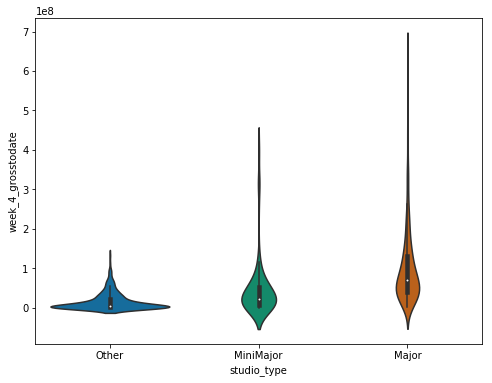

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(
    x='studio_type',
    y='week_4_grosstodate',
    data=df,
    order=['Other', 'MiniMajor', 'Major'])

### First week number of theaters by `studio_type`

There is a clear trend in number of theaters versus `studio_type`:
- The proportion of movies with limited runs is much higher for `Other` studios, followed by `MiniMajor` studios
- The proportion of movies with wide release is much higher for `Major` studios

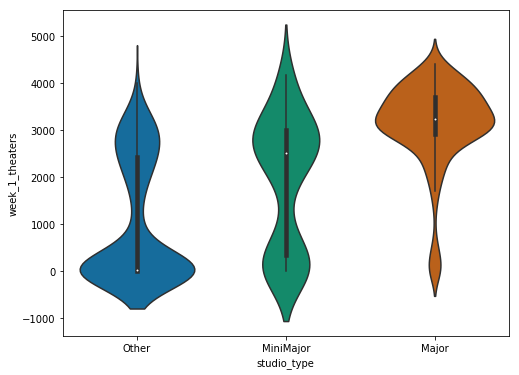

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(
    x='studio_type',
    y='week_1_theaters',
    data=df[(df['week_1_year'] > 2010)],
    order=['Other', 'MiniMajor', 'Major'])

### First week revenue-per-theater by `studio_type`

There is a larger tail for revenue-per-theater among `Other` studios, followed by `MiniMajor` studios. These appear to  correspond to very limited releases of big budget movies (e.g., Grand Budapest Hotel, La La Land)

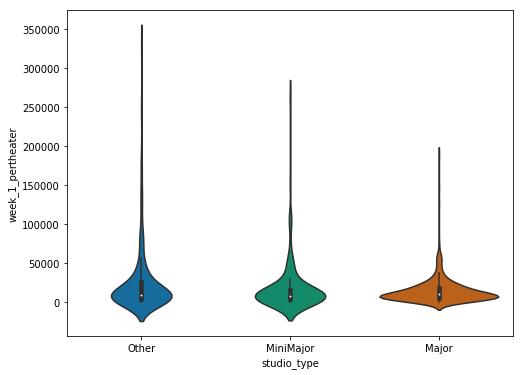

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(
    x='studio_type',
    y='week_1_pertheater',
    data=df,
    order=['Other', 'MiniMajor', 'Major'])

In [11]:
(df[[
    'movie_title', 'studio', 'studio_type', 'week_1_year', 'week_1_week',
    'week_1_pertheater', 'week_1_theaters'
]]).sort_values(
    by='week_1_pertheater', ascending=False).head()

,movie_title,studio,studio_type,week_1_year,week_1_week,week_1_pertheater,week_1_theaters
1105,The Grand Budapest Hotel,Fox Searchlight,Other,2014,10,331600.0,4
3278,La La Land,Lionsgate/Summit,MiniMajor,2016,50,261600.0,5
4487,The Master,Weinstein Company,Other,2012,37,251600.0,5
4973,Moonrise Kingdom,Focus Features,Other,2012,21,245500.0,4
7625,Blue Jasmine,Sony Classics,Other,2013,30,194400.0,6


However, the bulk of the distribution appears to not vary by studio

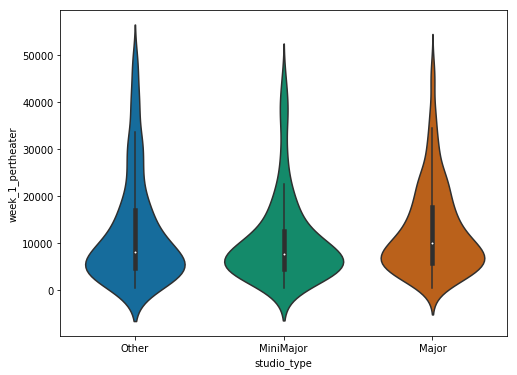

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(
    x='studio_type',
    y='week_1_pertheater',
    data=df[(df['week_1_pertheater'] < 50000)],
    order=['Other', 'MiniMajor', 'Major'])

### Are studios doing more limited releases at end-of-year to qualify for awards season?

This appears to be the case. There is a small bump at end-of-year.

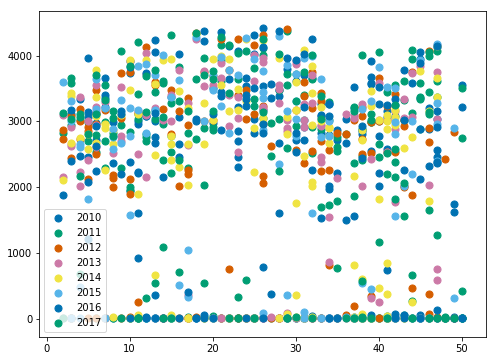

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))

year_min = 2010
year_max = 2017
years = range(year_min, year_max + 1)

colors = sns.color_palette(n_colors=len(years))

color_dict = dict(zip(years, colors))

for year in years:
    plt.scatter(
        df[df['week_1_year'] == year].week_1_week,
        df[df['week_1_year'] == year].week_1_theaters,
        c=color_dict[year],
        s=50,
        label=year)
plt.legend()

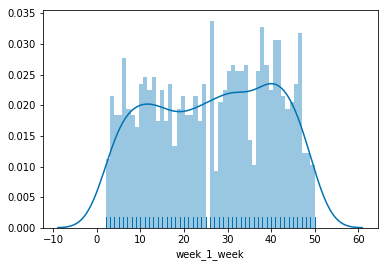

In [14]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.distplot(
    df['week_1_week'], ax=ax, rug=True, hist=True, bins=50)

## New feature: `box_office_power`

For each actor, I calculate the average week 1 per-theater revenue to-date, and call this the `box_office_power` of each actor

For each movie, I use the average `box_office_power` for actors listed (excluding those actors that have had no movies to date)

In [15]:
actors = df[['actor_1','actor_2', 'actor_3','actor_4', 'actor_5', 'actor_6']]

In [16]:
# Create hash table that will map actors to the index of movies they are in
# We will use this to calculate average per-theater gross-to-date of that actor (by release date)

actor_movies = {}
n = len(actors)
for i in range(n):
    for actor in actors.iloc[i].values:
        if type(actor) != str: # break when actor_i is nan
            break
        else:
            if actor in actor_movies:
                actor_movies[actor].append(actors.iloc[i].name)
            else:
                actor_movies[actor] = [actors.iloc[i].name]

In [17]:
def calculate_box_office_power(actor):
    movies = actor_movies[actor]

    week_1_revenues = df[['week_1_pertheater', 'release_date']].loc[movies]
    week_1_revenues.sort_values(by='release_date', inplace=True)
    week_1_revenues_average = pd.expanding_mean(
        week_1_revenues[['week_1_pertheater']].shift())
    actor_movies_week1[actor] = dict(
        zip(week_1_revenues_average.index,
            week_1_revenues_average['week_1_pertheater']))
    return None


In [18]:
# this will get number of actors N for each movie --- will average over the first N actors
num_actors = np.sum(actors.applymap(lambda x: type(x) == str),axis=1);

rows, cols = shape = actors.shape
actors_past_average = np.zeros(shape)
actors_checked = np.zeros(shape)

actor_movies_week1 = {}
for row in range(rows):
    for col in range(num_actors[row]):
        actor = actors.iloc[row,col] # iloc to use row, col; loc is to use index value
        movie_id = actors.iloc[row].name
        if actor not in actor_movies_week1: calculate_box_office_power(actor)
        actors_past_average[row,col] = actor_movies_week1[actor][movie_id]

In [19]:
# new arrays:
# actors_week_1_average_per_theater
# actors_checked_already [0/1]
#
# algorithm
# for each movie
# ...for each actor until nan
# ...... if already calculated: next actor
# ...... else
# ............calculate for each movie of actor

In [20]:
unique, counts = np.unique([str(x) for x in actors.values.flatten()], return_counts=True)

sorted_index = np.argsort(counts[:-1])[::-1]
sorted_actors = unique[:-1][sorted_index]
sorted_counts = counts[:-1][sorted_index]

print(len(sorted_actors), ' unique actors')

758  unique actors


In [21]:
np.nan_to_num(actors_past_average,copy=False)

df['box_office_power'] = np.sum(actors_past_average,axis=1) / np.sum(actors_past_average>0,axis=1)

### First month revenue vs `box_office_power`

Not a strong relationship. But we do see that R-rated movies generally have lower first month renuve

[None, None]

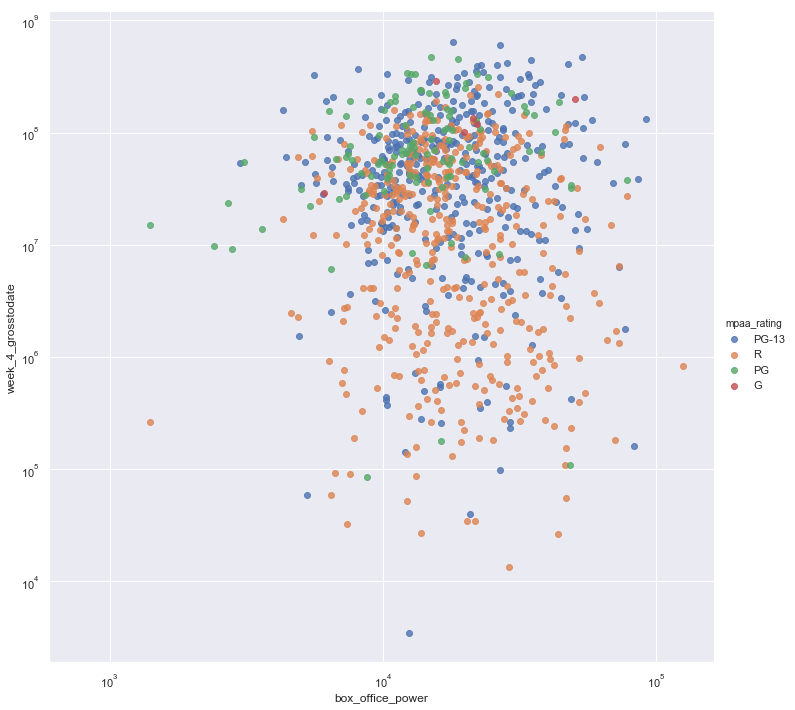

In [22]:
sns.set(style="darkgrid")

lm = sns.lmplot(
    x='box_office_power',
    y='week_4_grosstodate',
    data=df,
    hue='mpaa_rating',
    fit_reg=False,
    size=10)

ax = lm.axes

ax[0, 0].set(
    xscale="log", yscale="log")

## New label: box office smash (`smash`)



The distribution of first month revenues is highly skewed. The vast majority of movies make less than $10M in their first month.

**Definition**. I label movies as a box office `smash` if first month revenues >  $10M

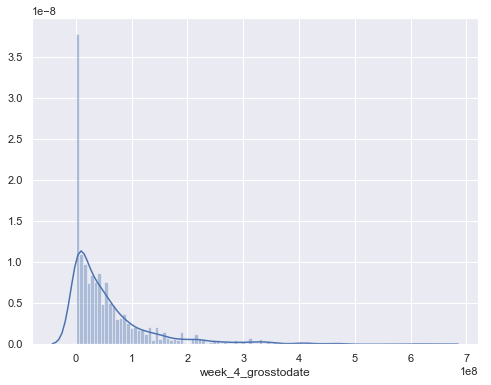

In [23]:
fig, ax = plt.subplots(figsize=(8,6))

sns.distplot(df['week_4_grosstodate'], bins=100)

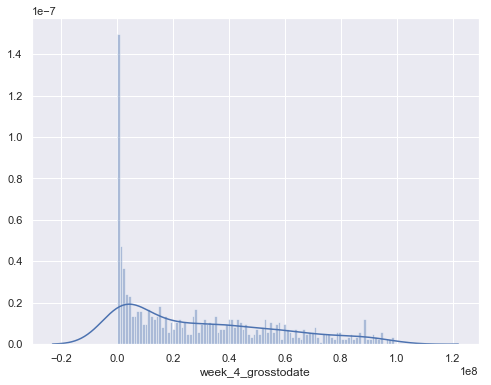

In [24]:
fig, ax = plt.subplots(figsize=(8,6))

sns.distplot(df['week_4_grosstodate'][df['week_4_grosstodate'] < 10**8], bins=100)

In [25]:
threshold = 5 * 10**7


def label_smash(revenue, threshold):
    if revenue < threshold: return 'not smash'
    return 'smash'


df['smash'] = df['week_4_grosstodate'].apply(
    lambda revenue: label_smash(revenue, threshold))

# Preprocessing: one-hot encoding and scaling features

We one-hot encode the categorical variables:
- `mpaa_rating`
- `studio_type`

and do standard scaling to the numerical variables:
- `box_office_power`
- `production_budget`

In [26]:
# One-hot encoding

data_for_model = df[[
    'movie_title', 'mpaa_rating', 'studio_type', 'production_budget',
    'box_office_power', 'week_4_grosstodate', 'smash'
]]

data_for_model = pd.get_dummies(
    data=data_for_model, columns=['mpaa_rating', 'studio_type'])

data_for_model.dropna(inplace=True)

In [27]:
scaler = StandardScaler()

data_for_model['production_budget'] = scaler.fit_transform(
    data_for_model['production_budget'].reshape(-1, 1)).reshape(-1)

data_for_model['box_office_power'] = scaler.fit_transform(
    data_for_model['box_office_power'].reshape(-1, 1)).reshape(-1)

# Model selection and prediction

I address two types of prediction problems:

- **Classification problem**. The simpler problem is to predict a binary outcome of whether or not a movie will be a "box-office smash" (a hit). We will use a threshold of 20 million (this threshold can be tuned)
- **Regression problem**. The more complex problem is to predict the numerical first month revenues

## Classification problem: will the movie will be a smash hit?

With the threshold of $50M in first month revenues, the classes are close to balanced: 53% of movies are considered a smash. Therefore, I do not do any balancing of the data.

**Features**.
- `box_office_power`
- `production_budget`
- `mpaa_rating` (one-hot encoding)
- `studio_type` (one-hot encoding)

**Performance**.

I use recall as the performance metric, which is equivalent to minimizing false negatives or minimizing the rate of missing out on smash hits.

The model has ~77% recall and ~87% AUC.

In [28]:
X_columns = [
    'box_office_power', 'mpaa_rating_G', 'mpaa_rating_PG', 'mpaa_rating_PG-13',
    'mpaa_rating_R', 'studio_type_Major', 'studio_type_MiniMajor',
    'studio_type_Other', 'production_budget'
]

X = data_for_model[X_columns]

Y = data_for_model['smash']

In [29]:
Y.value_counts(normalize=True)

smash        0.531202
not smash    0.468798
Name: smash, dtype: float64

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y)

reg = LogisticRegression()
reg.fit(X_train, Y_train)

Y_pred = reg.predict(X_test)
Y_pred_proba = reg.predict_proba(X_test)

### Confusion matrix.

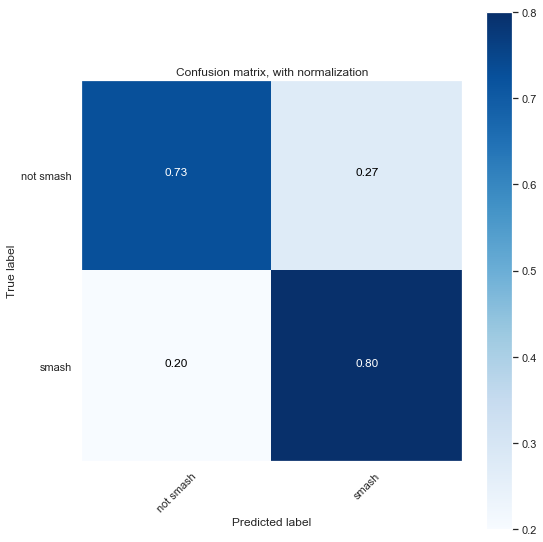

In [31]:
def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize: cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


cnf_matrix = confusion_matrix(Y_test, Y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(
    cnf_matrix,
    classes=['not smash', 'smash'],
    normalize=True,
    title='Confusion matrix, with normalization')
plt.grid('off')

### Recall and AUC

**Recall**.
The model has 77% recall (see macro avg below, which is equivalent to overall recall for binary classifier)

In [32]:
print(classification_report(Y_test, Y_pred, target_names = ['Not smash', 'Smash']))

              precision    recall  f1-score   support

   Not smash       0.76      0.73      0.74        62
       Smash       0.77      0.80      0.78        70

   micro avg       0.77      0.77      0.77       132
   macro avg       0.76      0.76      0.76       132
weighted avg       0.77      0.77      0.76       132



**AUC**. The model has 87% AUC

In [33]:
print('AUC: {:0.0f}%'.format(roc_auc_score(Y_test, Y_pred_proba[:,1]) * 100))

AUC: 87%


## Regression problem: what will be the first month box office revenue?

Now, I treat this as a regression problem: predicting first month box office revenue.

I run it twice, first with same full set of features as before, then just using a subset of features.

With the full set of features, the coefficient of determination R<sup>2</sup> = 47%, but the feature set appears to be multicollinear, which limits the interpretability of the coefficients and p-values.

Performance improves with the restricted set of features. R<sup>2</sup> = 65%, and multicollinearity does not appear to be an issue anymore. The most significant feature (based on size of coefficient) is whether the studio is a Major studio or not.

In [34]:
X_columns = [
    'box_office_power', 'production_budget', 'mpaa_rating_G', 'mpaa_rating_PG', 'mpaa_rating_PG-13',
    'mpaa_rating_R', 'studio_type_Major', 'studio_type_MiniMajor',
    'studio_type_Other'
]

X = data_for_model[X_columns]

Y = data_for_model['week_4_grosstodate']

### OLS initial run

The full set of features appears to be highly multicollinear, which means our coefficients and p-values have low fidelity.

Coefficient of determination R<sup>2</sup> = 47%

In [35]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     week_4_grosstodate   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     82.15
Date:                Sun, 28 Oct 2018   Prob (F-statistic):           3.37e-85
Time:                        17:21:41   Log-Likelihood:                -12728.
No. Observations:                 657   AIC:                         2.547e+04
Df Residuals:                     649   BIC:                         2.551e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
box_office_power       1.386e+06    2.5e+06      0.555      0.579   -3.52e+06    6.29e+06
production_budget      5.446e+07   2.96e+06     18.423      0.000    4.87e+07    6.03e+07
mpaa_rating_G          3.165e+07   2.72e+07      1.163      0.245   -2.18e+07    8.51e+07
mpaa_rating_PG         4.045e+07   7.35e+06      5.506      0.000     2.6e+07    5.49e+07
mpaa_rating_PG-13      3.179e+07   5.61e+06      5.672      0.000    2.08e+07    4.28e+07
mpaa_rating_R          3.159e+07   6.05e+06      5.224      0.000    1.97e+07    4.35e+07
studio_type_Major      5.224e+07   5.34e+06      9.774      0.000    4.17e+07    6.27e+07
studio_type_MiniMajor  5.042e+07   7.88e+06      6.398      0.000    3.49e+07    6.59e+07
studio_type_Other      3.282e+07   6.53e+06      5.028      0.000       2e+07    4.56e+07
==============================================================================
Omnibus:                      325.264   Durbin-Watson:                   1.700
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2938.453
Skew:                           2.009   Prob(JB):                         0.00
Kurtosis:                      12.550   Cond. No.                     1.22e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.46e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### OLS: production budget and studio type

I restrict to just production budget and studio type (only 2 of 3 classes are needed).

- Multicollinearity does not appear to be an issue here
- All features are significant based on p-values
- Coefficient of determination R<sup>2</sup> = 65%

In [36]:
X_columns = [
    'production_budget', 'studio_type_Major', 'studio_type_MiniMajor'
]

X = data_for_model[X_columns]

Y = data_for_model['week_4_grosstodate']

model = sm.OLS(Y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     week_4_grosstodate   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     396.0
Date:                Sun, 28 Oct 2018   Prob (F-statistic):          1.44e-146
Time:                        17:21:41   Log-Likelihood:                -12801.
No. Observations:                 657   AIC:                         2.561e+04
Df Residuals:                     654   BIC:                         2.562e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
production_budget      4.245e+07   2.85e+06     14.888      0.000    3.68e+07     4.8e+07
studio_type_Major      8.956e+07   3.59e+06     24.977      0.000    8.25e+07    9.66e+07
studio_type_MiniMajor   7.89e+07   8.04e+06      9.813      0.000    6.31e+07    9.47e+07
==============================================================================
Omnibus:                      236.986   Durbin-Watson:                   1.659
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1250.294
Skew:                           1.531   Prob(JB):                    3.18e-272
Kurtosis:                       9.025   Cond. No.                         3.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""